### Importing Essential Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Customer Churn Analysis - Data Exploration Started")
print("=" * 50)

🚀 Customer Churn Analysis - Data Exploration Started


### "🚀 Customer Churn Analysis - Data Exploration"

#### Data collection
URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [27]:
# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\varen\OneDrive\Documents\Projects\customer-churn-prediction-ml\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")
except FileNotFoundError:
    print("❌ Dataset not found. Please download from:")
except Exception as e:
    print(f"An error occured {e}")
else:
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Number of customers: {df.shape[0]:,}")
    print(f"Number of features: {df.shape[1]:,}")




✅ Dataset loaded successfully!
Dataset shape: (7043, 21)
Number of customers: 7,043
Number of features: 21


In [29]:
# Display first few rows
print("📋 First 5 rows of the dataset:")
print(df.head())

📋 First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0      

#### Basic Dataset Information

In [30]:
# Dataset basic information
print("\n📊 Dataset Information:")
print(df.info())

print("\n🔢 Basic Statistics:")
print(df.describe())


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [31]:
# Memory usage
print(f"\n💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


💾 Memory usage: 7.79 MB


#### Target Variable Analysis


🎯 TARGET VARIABLE ANALYSIS
Churn Distribution:
  No: 5,174 customers (73.5%)
  Yes: 1,869 customers (26.5%)

📈 Overall Churn Rate: 26.5%


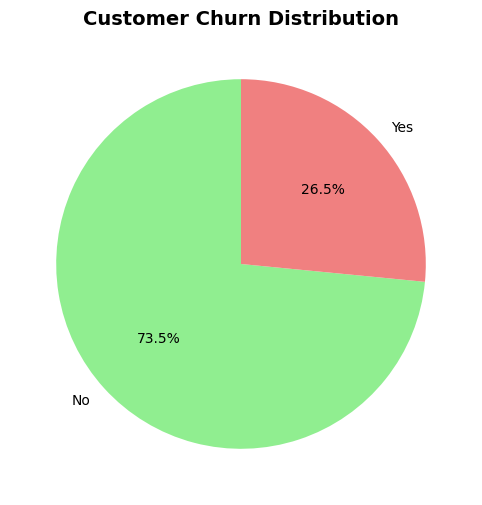

In [32]:
# Analyze our target variable - Churn
print("\n🎯 TARGET VARIABLE ANALYSIS")
print("=" * 40)

# Churn distribution
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for category, count in churn_counts.items():
    percentage = churn_percentage[category]
    print(f"  {category}: {count:,} customers ({percentage:.1f}%)")

# Calculate overall churn rate
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"\n📈 Overall Churn Rate: {churn_rate:.1f}%")

# Visualize churn distribution
plt.figure(figsize=(8, 6))
colors = ['lightgreen', 'lightcoral']
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.show()

#### Business Impact analysis

In [33]:
# Calculate business impact of churn
print("\n💰 BUSINESS IMPACT ANALYSIS")
print("=" * 35)

# Average monthly charges
avg_monthly_charges = df['MonthlyCharges'].mean()
print(f"Average monthly charges: ${avg_monthly_charges:.2f}")

# Revenue impact calculation
total_customers = len(df)
churned_customers = (df['Churn'] == 'Yes').sum()
monthly_revenue_loss = churned_customers * avg_monthly_charges
annual_revenue_loss = monthly_revenue_loss * 12

print(f"Churned customers: {churned_customers:,}")
print(f"Monthly revenue loss: ${monthly_revenue_loss:,.2f}")
print(f"Annual revenue loss: ${annual_revenue_loss:,.2f}")

# What if we reduce churn by 25%?
potential_savings = annual_revenue_loss * 0.25
print(f"\n🚀 Potential annual savings (25% churn reduction): ${potential_savings:,.2f}")


💰 BUSINESS IMPACT ANALYSIS
Average monthly charges: $64.76
Churned customers: 1,869
Monthly revenue loss: $121,039.60
Annual revenue loss: $1,452,475.24

🚀 Potential annual savings (25% churn reduction): $363,118.81


#### Feature Type Analysis

In [34]:
# Categorize features by type
print("\n🔬 FEATURE TYPE ANALYSIS")
print("=" * 30)

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target and ID from analysis
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')
if 'customerID' in categorical_features:
    categorical_features.remove('customerID')

print(f"📈 Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"📂 Categorical features ({len(categorical_features)}): {categorical_features}")

# Display unique values for categorical features
print("\n📋 Categorical Feature Analysis:")
for feature in categorical_features:
    unique_values = df[feature].nunique()
    print(f"  {feature}: {unique_values} unique values")
    if unique_values <= 10:  # Show values if not too many
        print(f"    Values: {list(df[feature].unique())}")


🔬 FEATURE TYPE ANALYSIS
📈 Numerical features (3): ['SeniorCitizen', 'tenure', 'MonthlyCharges']
📂 Categorical features (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

📋 Categorical Feature Analysis:
  gender: 2 unique values
    Values: ['Female', 'Male']
  Partner: 2 unique values
    Values: ['Yes', 'No']
  Dependents: 2 unique values
    Values: ['No', 'Yes']
  PhoneService: 2 unique values
    Values: ['No', 'Yes']
  MultipleLines: 3 unique values
    Values: ['No phone service', 'No', 'Yes']
  InternetService: 3 unique values
    Values: ['DSL', 'Fiber optic', 'No']
  OnlineSecurity: 3 unique values
    Values: ['No', 'Yes', 'No internet service']
  OnlineBackup: 3 unique values
    Values: ['Yes', 'No', 'No internet service']
  DeviceProtection: 3 unique values
    Va

#### Missing Values Analysis

In [35]:
# Check for missing values
print("\n🔍 MISSING VALUES ANALYSIS")
print("=" * 35)

missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create missing data summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})

# Only show features with missing values
missing_features = missing_summary[missing_summary['Missing_Count'] > 0]

if len(missing_features) > 0:
    print("Features with missing values:")
    print(missing_features)
else:
    print("✅ No missing values found!")

# Check data quality issues
print(f"\n📊 Data Quality Check:")
print(f"Total records: {len(df):,}")
print(f"Duplicate records: {df.duplicated().sum()}")
print(f"Complete records: {len(df.dropna()):,}")


🔍 MISSING VALUES ANALYSIS
✅ No missing values found!

📊 Data Quality Check:
Total records: 7,043
Duplicate records: 0
Complete records: 7,043


#### Numerical Features Analysis


📈 NUMERICAL FEATURES ANALYSIS
Statistical Summary:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


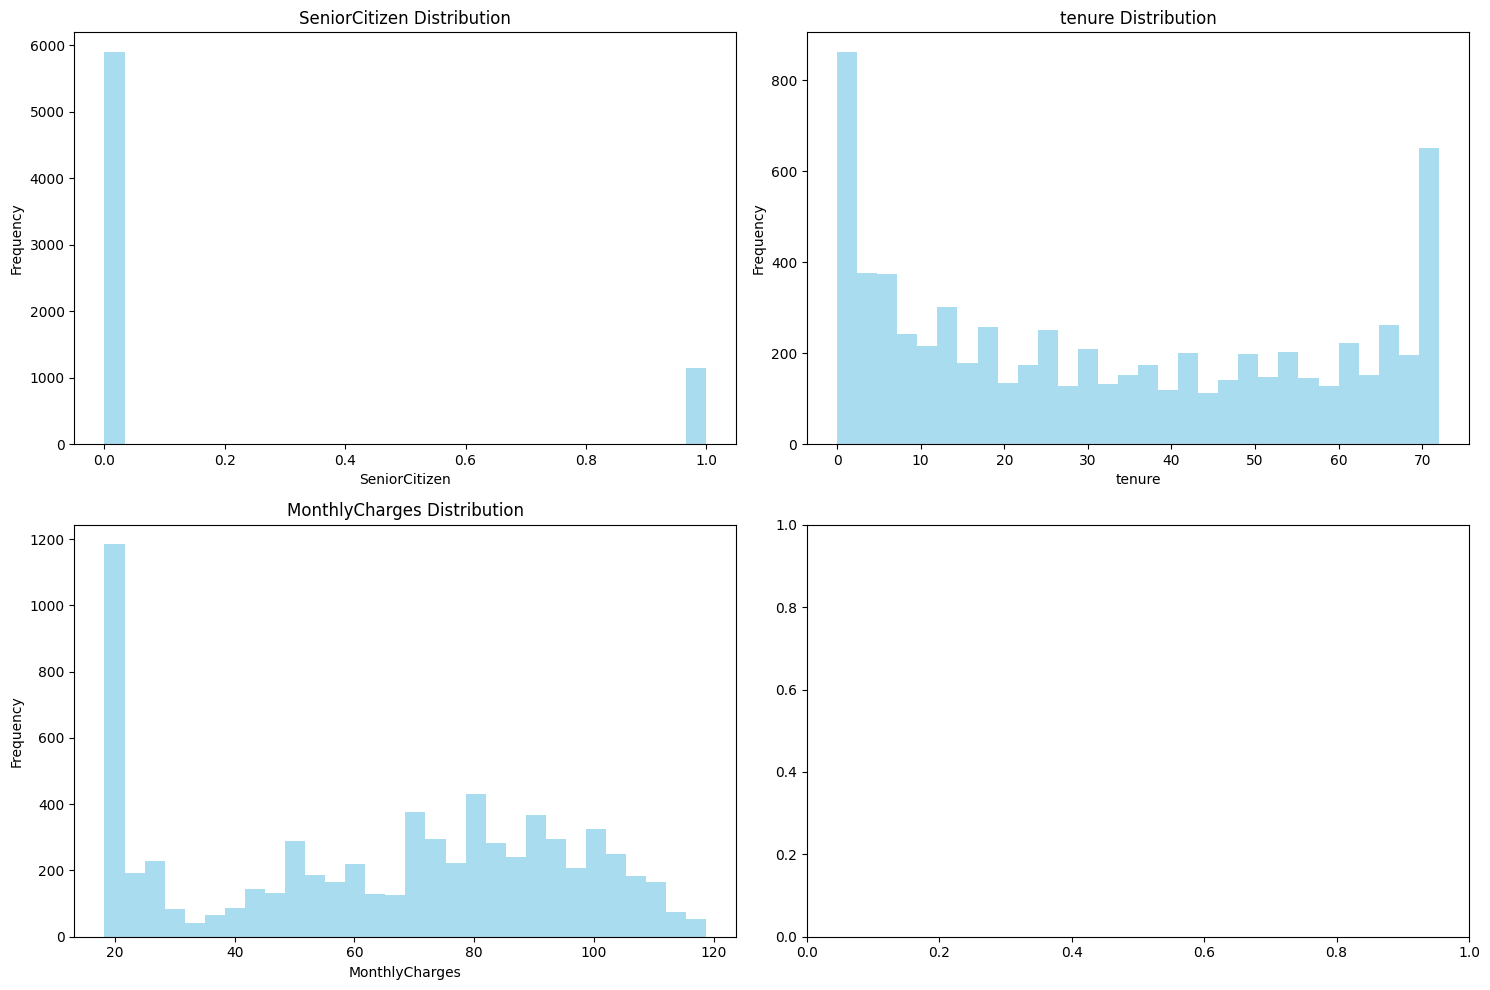


🔍 Outlier Analysis (IQR Method):
  SeniorCitizen: 1142 outliers (16.2%)
  tenure: 0 outliers (0.0%)
  MonthlyCharges: 0 outliers (0.0%)


In [36]:
# Analyze numerical features
print("\n📈 NUMERICAL FEATURES ANALYSIS")
print("=" * 40)

# Basic statistics for numerical features
print("Statistical Summary:")
print(df[numerical_features].describe())

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    if idx < len(axes):
        # Histogram
        axes[idx].hist(df[feature], bins=30, alpha=0.7, color='skyblue')
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check for outliers using IQR method
print("\n🔍 Outlier Analysis (IQR Method):")
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"  {feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

#### Categorical Features Analysis


📂 CATEGORICAL FEATURES ANALYSIS

🔍 gender:
  Male: 3555 (50.5%)
  Female: 3488 (49.5%)

🔍 Partner:
  No: 3641 (51.7%)
  Yes: 3402 (48.3%)

🔍 Dependents:
  No: 4933 (70.0%)
  Yes: 2110 (30.0%)

🔍 PhoneService:
  Yes: 6361 (90.3%)
  No: 682 (9.7%)

🔍 MultipleLines:
  No: 3390 (48.1%)
  Yes: 2971 (42.2%)
  No phone service: 682 (9.7%)

🔍 InternetService:
  Fiber optic: 3096 (44.0%)
  DSL: 2421 (34.4%)
  No: 1526 (21.7%)

🔍 OnlineSecurity:
  No: 3498 (49.7%)
  Yes: 2019 (28.7%)
  No internet service: 1526 (21.7%)

🔍 OnlineBackup:
  No: 3088 (43.8%)
  Yes: 2429 (34.5%)
  No internet service: 1526 (21.7%)

🔍 DeviceProtection:
  No: 3095 (43.9%)
  Yes: 2422 (34.4%)
  No internet service: 1526 (21.7%)

🔍 TechSupport:
  No: 3473 (49.3%)
  Yes: 2044 (29.0%)
  No internet service: 1526 (21.7%)

🔍 StreamingTV:
  No: 2810 (39.9%)
  Yes: 2707 (38.4%)
  No internet service: 1526 (21.7%)

🔍 StreamingMovies:
  No: 2785 (39.5%)
  Yes: 2732 (38.8%)
  No internet service: 1526 (21.7%)

🔍 Contract:
  Mont

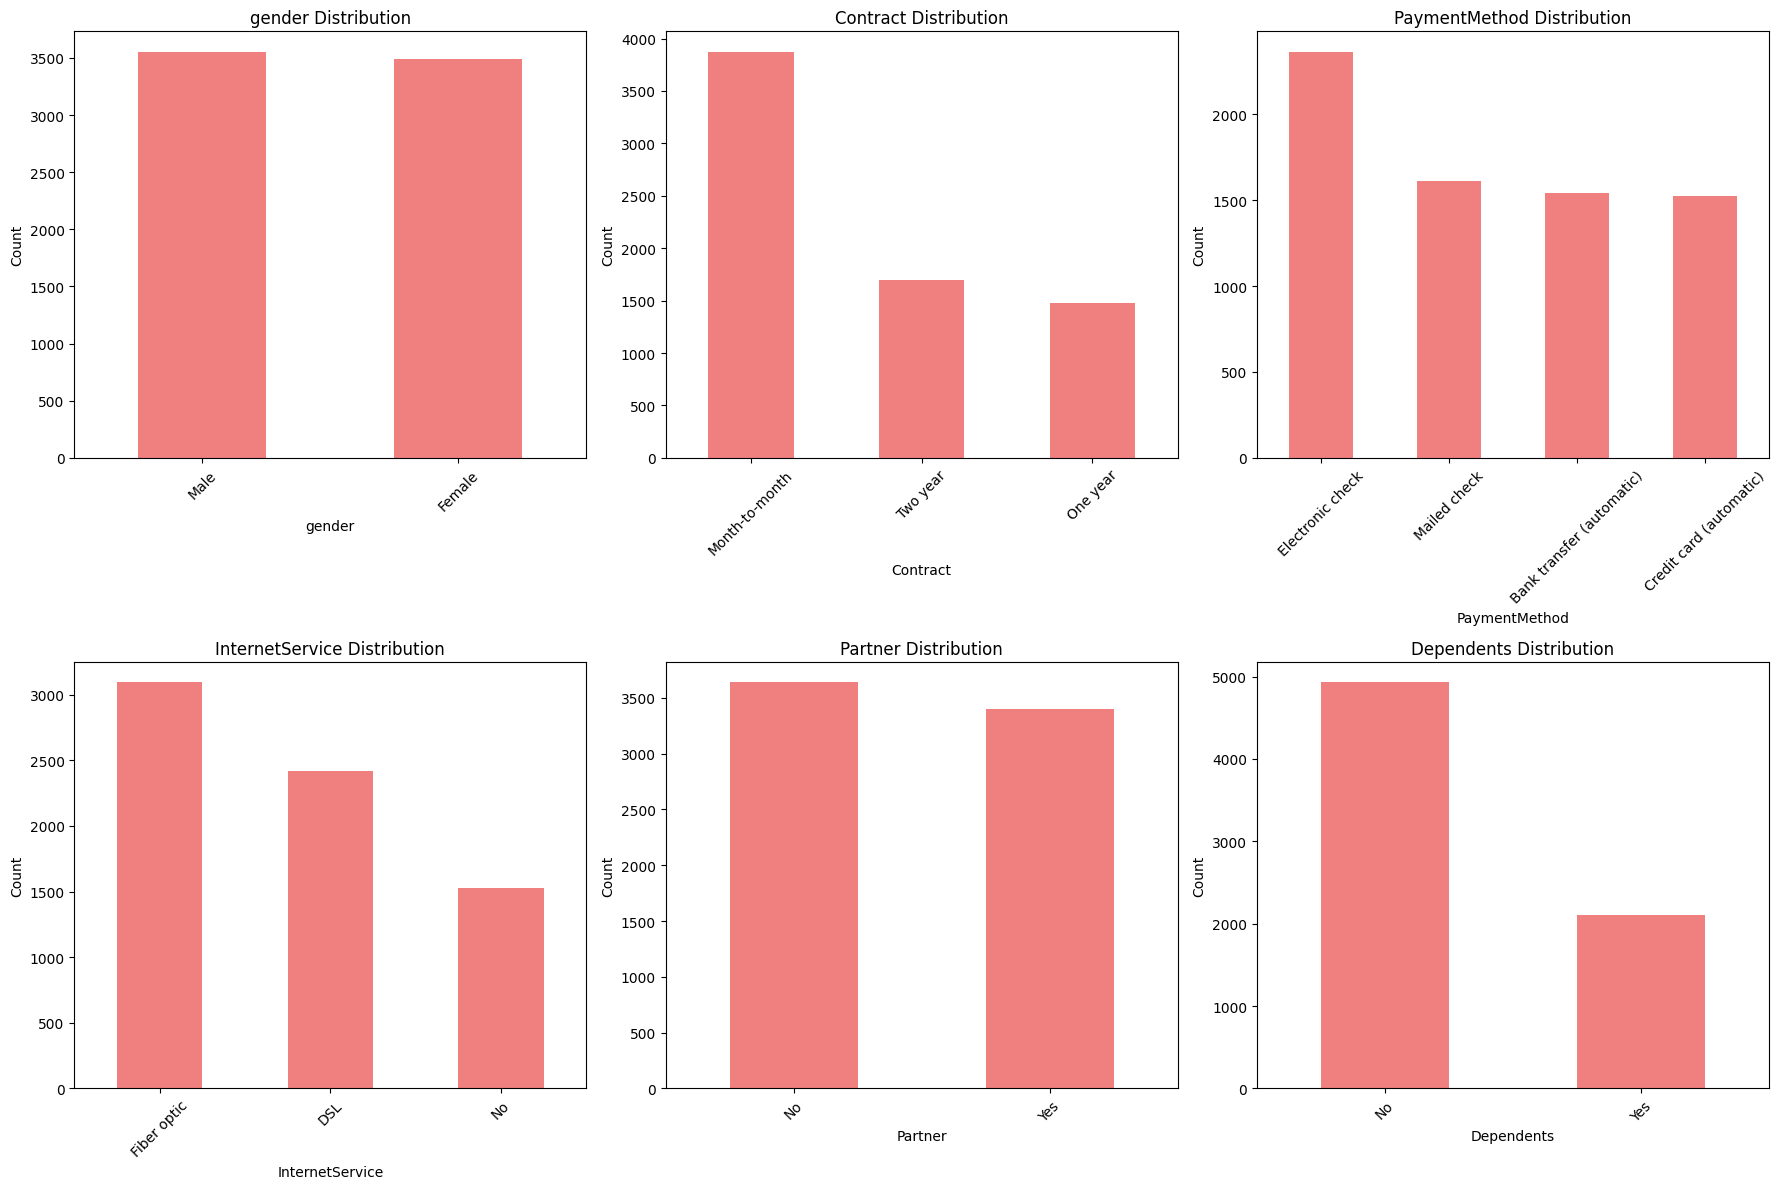

In [37]:
# Analyze categorical features
print("\n📂 CATEGORICAL FEATURES ANALYSIS")
print("=" * 40)

# Analyze each categorical feature
for feature in categorical_features:
    print(f"\n🔍 {feature}:")
    value_counts = df[feature].value_counts()
    value_percentages = df[feature].value_counts(normalize=True) * 100
    
    for category, count in value_counts.items():
        percentage = value_percentages[category]
        print(f"  {category}: {count} ({percentage:.1f}%)")

# Visualize some key categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_categorical = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'Partner', 'Dependents']

for idx, feature in enumerate(key_categorical):
    if idx < len(axes) and feature in categorical_features:
        df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='lightcoral')
        axes[idx].set_title(f'{feature} Distribution')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()